In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import os.path as op
import xrft
from dask.diagnostics import ProgressBar
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
from scipy.interpolate import PchipInterpolator as pchip
from matplotlib import colors, ticker
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bdir = '/swot/SUM02/takaya/channelMOC-Darwin/'
pdir = '/swot/SUM05/takaya/MITgcm/channel/runs/'

In [8]:
ys20, dy20 = (58,5)
ys10, dy10 = (272,10)
ys5, dy5 = (31,5)
dt = 12e2
df = 72
ts = int(360*86400*ys20/8e2 + 14e0*360*86400/dt)
te = int(ts + 360*86400*dy20/dt)
print(ts,te)
dsave = open_mdsdataset(op.join(pdir,'Phys-only_20km'), grid_dir=op.join(pdir,'20km_grid'),
                       iters=range(ts+72,te+72,72), prefix=['MOMtave'], delta_t=dt
                       )
dsave

2643840 2747520


/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/Phys-only_20km. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 50, XG: 50, YC: 100, YG: 100, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1440)
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * XG       (XG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * YG       (YG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dxG      (YG, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dyG      (YC, XG) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth    (YC, XC) >f4 das

[########################################] | 100% Completed |  6.7s


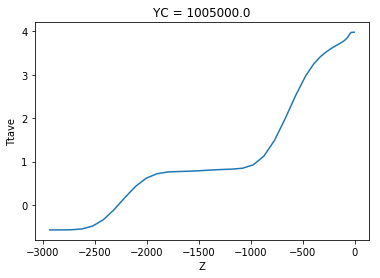

In [160]:
with ProgressBar():
    TtaveY100 = ds.Ttave.isel(YC=100).mean(['time','XC']).compute()
#     Ttave_d = dsd.Ttave.mean(['Z','XC','YC']).compute()
TtaveY100.plot()

In [24]:
print(TtaveY100)

<xarray.DataArray 'Ttave' (Z: 40)>
array([ 3.985888,  3.985745,  3.98545 ,  3.983915,  3.966047,  3.920065,
        3.867587,  3.820944,  3.778912,  3.736973,  3.689402,  3.629178,
        3.549727,  3.436502,  3.259982,  2.975538,  2.537717,  2.003233,
        1.509679,  1.151405,  0.954325,  0.877069,  0.855654,  0.845585,
        0.831978,  0.816625,  0.805079,  0.798033,  0.784428,  0.737878,
        0.624665,  0.426037,  0.159791, -0.120049, -0.350355, -0.494879,
       -0.560126, -0.579272, -0.582529, -0.58283 ], dtype=float32)
Coordinates:
    YC       >f4 1005000.0
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...


[########################################] | 100% Completed |  2.8s


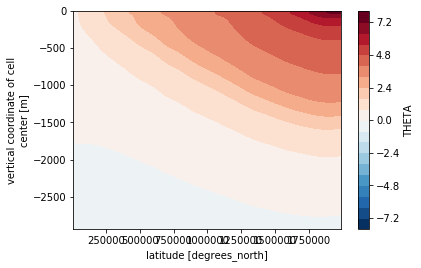

In [11]:
theta = dsave.THETA
with ProgressBar():
    T_clim = theta.mean(['time','XC']).compute()
T_clim.plot.contourf(levels=21)

In [13]:
dsFe = open_mdsdataset(op.join(bdir,'20km_mp10-15_mu092-067_Kp01-0175_Ki59-105_Kn015-035_g2-7_mz40_rFe1'), 
                       grid_dir=op.join(pdir,'20km_grid'),
                       iters=range(ts+df,te+df,df),
                       prefix=['FeTtave'], delta_t=dt
                      )
dsFe

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 50, XG: 50, YC: 100, YG: 100, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1440)
Coordinates:
  * XC        (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC        (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * XG        (XG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * YG        (YG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA        (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dxG       (YG, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dyG       (YC, XG) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth     (YC

In [14]:
grid = Grid(dsFe, periodic=["X"])
grid

<xgcm.Grid>
Y Axis (not periodic):
  * center   YC (100) --> left
  * left     YG (100) --> center
X Axis (periodic):
  * center   XC (50) --> left
  * left     XG (50) --> center
Z Axis (not periodic):
  * center   Z (40) --> left
  * left     Zl (40) --> center
  * outer    Zp1 (41) --> center
  * right    Zu (40) --> center
T Axis (not periodic):
  * center   time (1440)

In [15]:
diff = dsFe.DFrITr03
diff

<xarray.DataArray 'DFrITr03' (time: 1440, Zl: 40, YC: 100, XC: 50)>
dask.array<shape=(1440, 40, 100, 50), dtype=float32, chunksize=(1, 40, 100, 50)>
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth    (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    iter     (time) int64 dask.array<shape=(1440,), chunksize=(1,)>
  * time     (time) float64 3.173e+09 3.173e+09 3.173e+09 3.173e+09 ...
Attributes:
    standard_name:  DFrITr03
    long_name:      Vertical Diffusive Flux of FeT (Implicit part)
    units:          mM/m^3 .m^3/s

In [16]:
with ProgressBar():
    diff_mn = (diff*dsFe.rA**-1*(360*86400)*1e3).mean(['time','XC']).compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  1min 35.7s


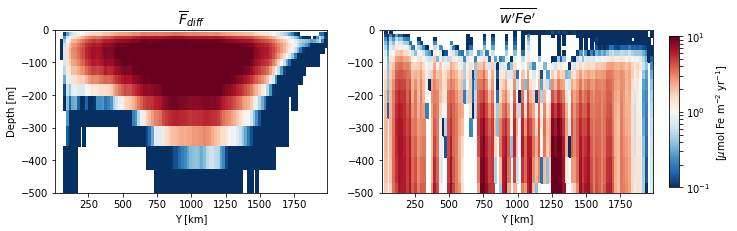

In [45]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11,3))
# fig.set_tight_layout(True)
im = ax1.pcolormesh(diff.YC*1e-3, diff.Zl, diff_mn,
                   vmin=1e-1, vmax=1e1, cmap='RdBu_r', norm=colors.LogNorm(),
                   rasterized=True)
ax2.pcolormesh(wpFep_b.YC*1e-3, wpFep_b.Z, wpFep_b*(360*86400)*1e3,
              vmin=1e-1, vmax=1e1, cmap='RdBu_r', norm=colors.LogNorm(),
              rasterized=True)
ax1.set_ylim([-5e2,0.])
ax2.set_ylim([-5e2,0.])
ax1.set_xlabel(r"Y [km]")
ax1.set_ylabel(r"Depth [m]")
ax2.set_xlabel(r"Y [km]")
ax1.set_title(r"$\overline{F}_{diff}$", fontsize=14)
ax2.set_title(r"$\overline{w' Fe'}$", fontsize=14)
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]")
# plt.savefig(op.join(ddir, 'Figures/VertDiff_wFe_Fe_20km.pdf'))

In [18]:
Fe1D = dsFe.TRAC03
Fe1D.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy20))
with ProgressBar():
    Fe_seas = Fe1D.groupby('seas').mean('time').compute()
Fe_seas

[########################################] | 100% Completed |  1min 32.7s


<xarray.DataArray 'TRAC03' (seas: 4, Z: 40, YC: 100, XC: 50)>
array([[[[0.000000e+00, ..., 0.000000e+00],
         ...,
         [2.991838e-05, ..., 3.064959e-05]],

        ...,

        [[0.000000e+00, ..., 0.000000e+00],
         ...,
         [3.132988e-04, ..., 3.132813e-04]]],


       ...,


       [[[0.000000e+00, ..., 0.000000e+00],
         ...,
         [9.342701e-05, ..., 9.194209e-05]],

        ...,

        [[0.000000e+00, ..., 0.000000e+00],
         ...,
         [3.118443e-04, ..., 3.118439e-04]]]], dtype=float32)
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    rA       (YC, XC) >f4 400000000.0 400000000.0 400000000.0 400000000.0 ...
    Depth    (YC, XC) >f4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


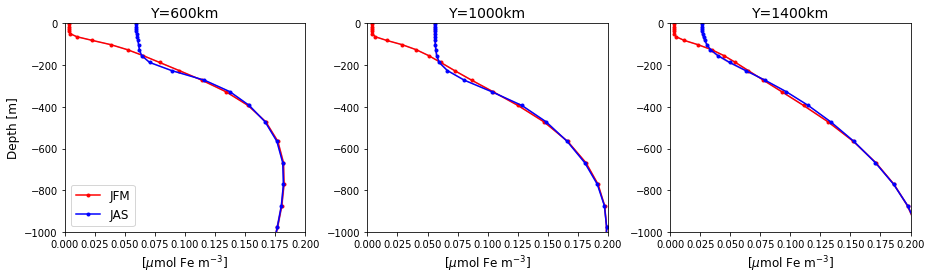

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13,4))
fig.set_tight_layout(True)
ax1.plot(Fe_seas[0,:,30].mean(['XC'])*1e3, Fe_seas.Z[:], 'r.-', label='JFM')
ax1.fill_betweenx(Fe_seas.Z[:], (Fe_seas[0,:,30].mean(['XC'])-Fe_seas[0,:,30].std(['XC']))*1e3,
                 (Fe_seas[0,:,30].mean(['XC'])+Fe_seas[0,:,30].std(['XC']))*1e3, 
                 color='b', alpha=0.2)
ax1.plot(Fe_seas[2,:,30].mean(['XC'])*1e3, Fe_seas.Z[:], 'b.-', label='JAS')
ax1.fill_betweenx(Fe_seas.Z[:], (Fe_seas[2,:,30].mean(['XC'])-Fe_seas[2,:,30].std(['XC']))*1e3,
                 (Fe_seas[2,:,30].mean(['XC'])+Fe_seas[2,:,30].std(['XC']))*1e3, 
                 color='r', alpha=0.2)
ax1.set_ylim([-10e2,0.])
ax1.set_xlim([0.,.2])
ax1.set_xlabel(r"[$\mu$mol Fe m$^{-3}$]", fontsize=12)
ax1.legend(loc='lower left', fontsize=12)

ax2.plot(Fe_seas[0,:,50].mean(['XC'])*1e3, Fe_seas.Z[:], 'r.-')
ax2.fill_betweenx(Fe_seas.Z[:], (Fe_seas[0,:,50].mean(['XC'])-Fe_seas[0,:,50].std(['XC']))*1e3,
                 (Fe_seas[0,:,50].mean(['XC'])+Fe_seas[0,:,50].std(['XC']))*1e3, 
                 color='b', alpha=0.2)
ax2.plot(Fe_seas[2,:,50].mean(['XC'])*1e3, Fe_seas.Z[:], 'b.-')
ax2.fill_betweenx(Fe_seas.Z[:], (Fe_seas[2,:,50].mean(['XC'])-Fe_seas[2,:,50].std(['XC']))*1e3,
                 (Fe_seas[2,:,50].mean(['XC'])+Fe_seas[2,:,50].std(['XC']))*1e3, 
                 color='r', alpha=0.2)
ax2.set_ylim([-10e2,0.])
ax2.set_xlim([0.,.2])
ax2.set_xlabel(r"[$\mu$mol Fe m$^{-3}$]", fontsize=12)

ax3.plot(Fe_seas[0,:,70].mean(['XC'])*1e3, Fe_seas.Z[:], 'r.-')
ax3.fill_betweenx(Fe_seas.Z[:], (Fe_seas[0,:,70].mean(['XC'])-Fe_seas[0,:,70].std(['XC']))*1e3,
                 (Fe_seas[0,:,70].mean(['XC'])+Fe_seas[0,:,70].std(['XC']))*1e3, 
                 color='b', alpha=0.2)
ax3.plot(Fe_seas[2,:,70].mean(['XC'])*1e3, Fe_seas.Z[:], 'b.-')
ax3.fill_betweenx(Fe_seas.Z[:], (Fe_seas[2,:,70].mean(['XC'])-Fe_seas[2,:,70].std(['XC']))*1e3,
                 (Fe_seas[2,:,70].mean(['XC'])+Fe_seas[2,:,70].std(['XC']))*1e3, 
                 color='r', alpha=0.2)
ax3.set_ylim([-10e2,0.])
ax3.set_xlim([0.,.2])
ax3.set_xlabel(r"[$\mu$mol Fe m$^{-3}$]", fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax1.set_title(r"Y=600km", fontsize=14)
ax2.set_title(r"Y=1000km", fontsize=14)
ax3.set_title(r"Y=1400km", fontsize=14)
plt.savefig(op.join(ddir,'Figures/Iron_profiles_20kmrun.pdf'))

In [170]:
nz = 8
fig, ax = plt.subplots(figsize=(4,5))
ax.plot(Fe1D)

<xarray.DataArray 'Z' (Z: 8)>
array([  -5. ,  -15. ,  -25. ,  -36. ,  -49. ,  -64. ,  -81.5, -102. ],
      dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0
    drF      (Z) >f4 dask.array<shape=(8,), chunksize=(8,)>
    PHrefC   (Z) >f4 dask.array<shape=(8,), chunksize=(8,)>
Attributes:
    standard_name:  depth
    long_name:      vertical coordinate of cell center
    units:          m
    positive:       down
    axis:           Z <xarray.DataArray 'Zl' (Zl: 8)>
array([  0., -10., -20., -30., -42., -56., -72., -91.], dtype=float32)
Coordinates:
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0
Attributes:
    standard_name:      depth_at_upper_w_location
    long_name:          vertical coordinate of upper cell interface
    units:              m
    positive:           down
    axis:               Z
    c_grid_axis_shift:  -0.5


In [22]:
Fe = dsFe.TRAC03
dFedz = (grid.diff(Fe.mean('XC'),'Z',boundary='fill')/grid.diff(Fe.Z,'Z',boundary='fill'))[:,9:]
nFez_clim = np.argmax(dFedz,axis=1).compute()
nFez_clim+9

<xarray.DataArray (time: 1440, YC: 100)>
array([[ 9, 10, 13, ..., 32, 32, 32],
       [ 9, 11, 13, ..., 32, 32, 32],
       [ 9, 12, 13, ..., 32, 32, 32],
       ...,
       [ 9, 17, 14, ..., 32, 32, 32],
       [ 9, 17, 14, ..., 32, 32, 32],
       [ 9, 17, 14, ..., 32, 32, 32]])
Coordinates:
  * time     (time) float64 3.173e+09 3.173e+09 3.173e+09 3.173e+09 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...

In [11]:
# dFedz.mean(['time','XC']).plot(vmax=2e-6)

In [23]:
N = nFez_clim.shape
zFe_clim = np.zeros_like(nFez_clim)
for i in range(N[0]):
    for j in range(N[1]):
        zFe_clim[i,j] = dsFe.Zl[int(nFez_clim[i,j])]

In [14]:
# zFe = xr.DataArray(zFe, dims=nFez.dims, coords=nFez.coords)
# zFe.to_dataset(name='ferricline').to_netcdf(op.join(ddir,'zerores_-2monDML_ferricline.nc'))

In [24]:
# # zFe_clim = xr.DataArray(zFe.mean(axis=0), dims=nFez[0].dims, coords=nFez[0].coords)
zFe_clim = xr.DataArray(zFe_clim, dims=nFez_clim.dims, coords=nFez_clim.coords)
zFe_clim

<xarray.DataArray (time: 1440, YC: 100)>
array([[    0,   -10,   -42, ..., -1234, -1234, -1234],
       [    0,   -20,   -42, ..., -1234, -1234, -1234],
       [    0,   -30,   -42, ..., -1234, -1234, -1234],
       ...,
       [    0,  -113,   -56, ..., -1234, -1234, -1234],
       [    0,  -113,   -56, ..., -1234, -1234, -1234],
       [    0,  -113,   -56, ..., -1234, -1234, -1234]])
Coordinates:
  * time     (time) float64 3.173e+09 3.173e+09 3.173e+09 3.173e+09 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...

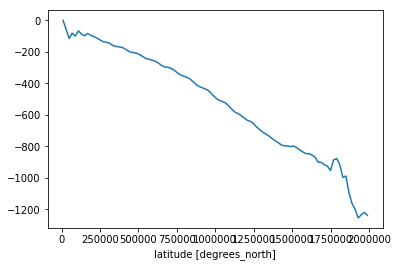

In [25]:
zFe_clim.mean('time').plot()

In [26]:
with ProgressBar():
    dsFe_clim = dsFe.mean(['time','XC','XG']).load()

[########################################] | 100% Completed |  1min 42.6s


In [27]:
Feb = dsFe_clim.TRAC03
vFeb = dsFe_clim.VTRAC03
wFeb = dsFe_clim.WTRAC03
FadvV = dsFe_clim.ADVyTr03
FadvW = dsFe_clim.ADVrTr03
kppb = dsFe_clim.KPPgTr03
dfib = dsFe_clim.DFrITr03
bgcb = dsFe_clim.FeTbgc

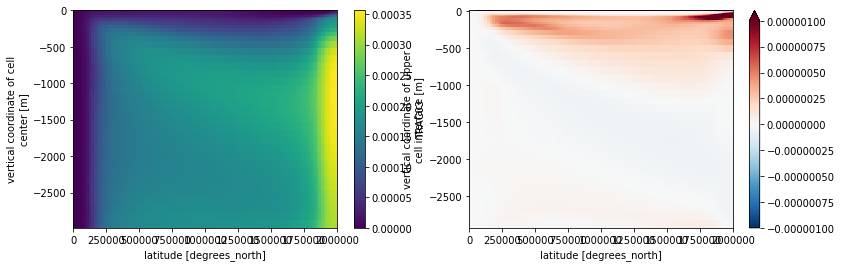

In [28]:
dFebdz = grid.diff(Feb,'Z',boundary='fill')/grid.diff(Feb.Z,'Z',boundary='fill')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,4))
Feb.plot(ax=ax1)
(-dFebdz).plot(ax=ax2, vmax=1e-6, vmin=-1e-6, cmap='RdBu_r')

In [156]:
dFebdz.Zl

<xarray.DataArray 'Zl' (Zl: 40)>
array([    0.,   -10.,   -20.,   -30.,   -42.,   -56.,   -72.,   -91.,  -113.,
        -139.,  -169.,  -205.,  -247.,  -297.,  -357.,  -429.,  -514.,  -616.,
        -719.,  -822.,  -925., -1028., -1131., -1234., -1337., -1440., -1543.,
       -1646., -1749., -1852., -1955., -2058., -2161., -2264., -2367., -2470.,
       -2573., -2676., -2779., -2882.], dtype=float32)
Coordinates:
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
Attributes:
    standard_name:      depth_at_upper_w_location
    long_name:          vertical coordinate of upper cell interface
    units:              m
    positive:           down
    axis:               Z
    c_grid_axis_shift:  -0.5

In [17]:
# dsM = open_mdsdataset(op.join(ddir,'zerores_10km_MOMbgc'), grid_dir=op.join(ddir,'10km_grid'),
#                      iters=range(ts,te,df), prefix=['MOMtave'], delta_t=dt
#                      )
# with ProgressBar():
#     dsM_clim = dsM.mean(['time','XC','XG']).load()

/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/takaya/MITgcm/channel/runs/zerores_10km_MOMbgc. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


[########################################] | 100% Completed |  5min 25.2s


In [17]:
# dsM_clim

<xarray.Dataset>
Dimensions:  (YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40)
Coordinates:
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YG       (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    drC      (Zp1) float64 5.0 10.0 10.0 11.0 13.0 15.0 17.5 20.5 24.0 28.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
    PHrefF   (Zp1) >f4 0.0 98.1 196.2 294.3 412.02 549.36 706.32 892.71 ...
Data variables:
    UVEL     (Z, YC) float32 0.0 -0.008652336 -0.010314678 -0.009670425 ...
    VVEL     (Z, YG) float32 0.

In [22]:
# ys10_2, dy10_2 = (260,10)
# ys5, dy5 = (31,5)
# ts2 = int(360*86400*ys10_2/dt+df)
# te2 = int(360*86400*(ys10_2+dy10_2)/dt+df)
# print(ts2,te2)
# dsK = open_mdsdataset(op.join(ddir,'deepML-2mon_layersKPP'), grid_dir=op.join(ddir,'10km_grid'),
#                      iters=range(ts2,te2,df),
#                      prefix=['KPPboundary'], delta_t=dt
#                      )
# with ProgressBar():
#     dsK_clim = dsK.mean(['time','XC','XG']).load()

13478544 13996944


/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


[########################################] | 100% Completed | 29.8s


In [60]:
# dsK_clim

<xarray.Dataset>
Dimensions:              (YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41)
Coordinates:
  * YC                   (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 ...
  * YG                   (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 ...
  * Z                    (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 ...
  * Zp1                  (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
  * Zu                   (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 ...
  * Zl                   (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
    drC                  (Zp1) float64 5.0 10.0 10.0 11.0 13.0 15.0 17.5 ...
    drF                  (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 ...
    PHrefC               (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 ...
    PHrefF               (Zp1) >f4 0.0 98.1 196.2 294.3 412.02 549.36 706.32 ...
  * layer_1TH_bounds     (layer_1TH_bounds) >f

In [38]:
MLDb = xr.open_dataset(op.join(pdir,'KPPMLD_20km.nc')).mld.mean(['time','XC'])
MXLDb = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_20km.nc')).hbl99.mean(['time'])

In [31]:
vb = dsave.VVEL.mean(['time','XC'])
wb = dsave.WVEL.mean(['time','XC'])

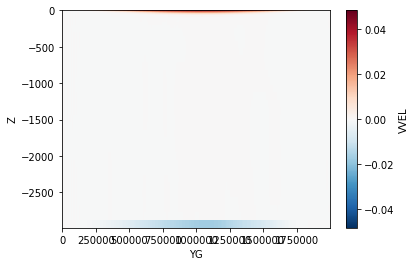

In [63]:
vb.plot()

### $$\overline{{\bf v}\text{Fe}} = \overline{{\bf v}}\overline{\text{Fe}} + \overline{{\bf v}' \text{Fe}'}$$

In [32]:
vbFeb = grid.interp(vb,'Y',boundary='fill')*Feb
wbFeb = grid.interp(wb,'Z',boundary='fill')*Feb
vpFep_b = grid.interp(vFeb,'Y',boundary='fill') - vbFeb
wpFep_b = wFeb - wbFeb

print(vpFep_b, wpFep_b)

<xarray.DataArray (Z: 40, YC: 100)>
dask.array<shape=(40, 100), dtype=float32, chunksize=(40, 99)>
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ... <xarray.DataArray (Z: 40, YC: 100)>
dask.array<shape=(40, 100), dtype=float32, chunksize=(39, 100)>
Coordinates:
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...


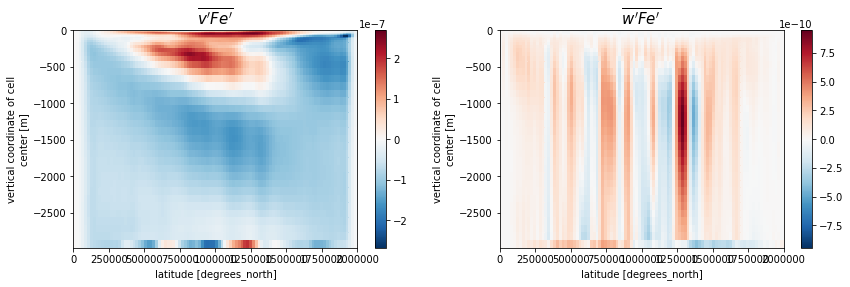

In [33]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
(vpFep_b).plot(ax=ax1)
(wpFep_b).plot(ax=ax2)
ax1.set_title(r"$\overline{v'Fe'}$", fontsize=15, rasterized=True)
ax2.set_title(r"$\overline{w'Fe'}$", fontsize=15, rasterized=True)
plt.savefig(op.join(ddir,'Eddyfluxes.pdf'))

In [155]:
# dsave = vpFep_b.to_dataset(name='vFe')
# dsave['wFe'] = wpFep_b
# dsave.to_netcdf(op.join(ddir,'Clim-of-vpFep_wpFep.nc'))
# d = {'vFe': vpFep_b.data, 'wFe': wpFep_b.data}
# df = pd.DataFrame(data=vpFep_b.data, index=ds.Z.data, columns=ds.YC.data, dtype=np.float)
# df.to_csv(op.join(ddir,'vFe.csv'))
# df = pd.DataFrame(data=wpFep_b.data, index=ds.Z.data, columns=ds.YC.data, dtype=np.float)
# df.to_csv(op.join(ddir,'wFe.csv'))
# df = pd.read_csv(op.join(ddir,'wFe.csv'))
# df

In [107]:
print(vpFep_b.dims, ds.dxG.mean('XC').dims, ds.rA.mean('XC').dims,
      grid.diff(wpFep_b,'Z',boundary='fill').dims, ds.drF.dims)

('Z', 'YC') ('YG',) ('YC',) ('Zl', 'YC') ('Z',)


In [36]:
fe_intrp = grid.interp(Feb, 'Y', boundary='fill')
temp = (vb * fe_intrp).compute()
temp = vFeb - temp
advpfep_bar = grid.diff(temp*dsave.dxG.mean('XC'),'Y',
                        boundary='fill') * dsave.rA.mean('XC')**-1

fe_intrp = grid.interp(Feb, 'Z', boundary='fill')
temp = (wb * fe_intrp).compute()
temp = grid.interp(wFeb,'Z',boundary='fill') - temp
adwpfep_bar = grid.diff(temp,'Z',boundary='fill') * dsave.drF**-1

advpp_b = -(-adwpfep_bar + advpfep_bar)
advpp_b

<xarray.DataArray (Z: 40, YC: 100)>
dask.array<shape=(40, 100), dtype=float32, chunksize=(40, 99)>
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    PHrefC   (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>

In [29]:
# MXLD = xr.open_dataset(op.join(ddir,'KPPhbl_99percentile_5km.nc')).hbl99
# hbl = dsK.KPPhbl
# MXLD = xr.DataArray(np.percentile(hbl, 99, axis=-1), dims=['time','YC'],
#                     coords={'time':dsK.time,'YC':dsK.YC})
# MXLD
# MLD = xr.open_dataset(op.join(ddir,'MLD_10km.nc')).mean(['time','XC'])
# MXLD = xr.open_dataset(op.join(ddir,'MXLD_10km.nc')).mean('time')
# MLD = xr.open_dataarray(op.join(ddir,'MLD_10km_zonalave.nc')).mean(['time','XC']).compute()
# MXLD = xr.open_dataarray(op.join(ddir,'MXLD_10km_zonalave.nc')).mean('time').compute()

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/dask/local.py:253: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


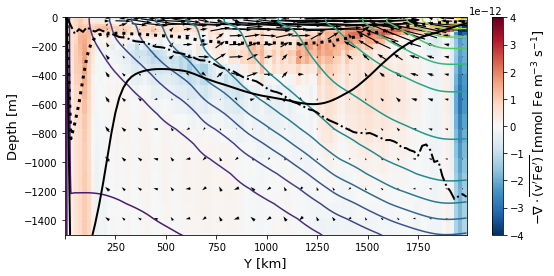

In [41]:
Tlevs = np.arange(-1.,8.5,.5) + 0.
yst = 10
dny = 4
dnz = 2
yy, zz = np.meshgrid(dsave.YC.data[yst::dny], dsave.Z.data[::dnz])
N = wpFep_b.data[::dnz,yst::dny].shape

fig, ax = plt.subplots(figsize=(9,4))
# fig.set_tight_layout(True)
im = ax.pcolormesh(T_clim.YC, T_clim.Z, advpp_b, 
                   vmin=-4e-12, vmax=4e-12, cmap='RdBu_r',
                   rasterized=True)
ax.plot(MLDb.YC, -MLDb, 'k', lw=2)
ax.plot(MXLDb.YC, -MXLDb, 'k:', lw=3)
ax.plot(zFe_clim.YC, zFe_clim.mean('time'), 'k-.', lw=2)
ax.contour(T_clim.YC, T_clim.Z, T_clim, levels=Tlevs)
#            , cmap='RdBu_r')
ax.quiver(yy, zz, (vpFep_b/Feb)[::dnz,yst::dny], 
          np.ones((N[0],N[1]))*(wpFep_b/Feb)[::dnz,yst::dny], 
          pivot='mid', angles='xy')
#           , scale_units='xy', scale=1.)
ax.set_xticks(np.arange(0.,2e6,2.5e5))
ax.set_xticklabels(['','250','500','750','1000','1250','1500','1750'])
ax.set_xlabel('Y [km]', fontsize=13)
ax.set_ylabel('Depth [m]', fontsize=13)
ax.set_ylim([-1500,0.])
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"$-\nabla\cdot\overline{({\tt v'Fe'})}$ [mmol Fe m$^{-3}$ s$^{-1}$]", fontsize=13)
# plt.savefig(op.join(ddir,'Figures/eddyfluxvector_20km.pdf'))

In [8]:
dsw = xr.open_mfdataset(op.join(ddir, 'wa_wp-year*_10km.nc'))
dsw

<xarray.Dataset>
Dimensions:  (XC: 100, YC: 50, Zl: 200, time: 120)
Coordinates:
  * Zl       (Zl) float64 -10.0 -24.43 -38.86 -53.3 -67.73 -82.16 -96.59 ...
  * YC       (YC) float32 1005000.0 1015000.0 1025000.0 1035000.0 1045000.0 ...
  * XC       (XC) float32 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * time     (time) float64 8.46e+09 8.462e+09 8.463e+09 8.464e+09 8.466e+09 ...
Data variables:
    wa       (time, Zl, YC, XC) float64 dask.array<shape=(120, 200, 50, 100), chunksize=(24, 200, 50, 100)>
    wp       (time, Zl, YC, XC) float64 dask.array<shape=(120, 200, 50, 100), chunksize=(24, 200, 50, 100)>

In [9]:
seas = np.tile(np.repeat(range(4),3),dy10)
ds.coords['seas'] = ('time',seas)
seas = np.tile(np.repeat(range(4),90),dy10)
dsM.coords['seas'] = ('time',seas)
dsFe.coords['seas'] = ('time',seas)
# dsK.coords['seas'] = ('time',seas)

with ProgressBar():
    ds_seas = ds.groupby('seas').mean(['time','XC','XG']).load()
    dsM_seas = dsM.groupby('seas').mean(['time','XC','XG']).load()
    dsFe_seas = dsFe.groupby('seas').mean(['time','XC','XG']).load()
#     dsK_seas = dsK.groupby('seas').mean(['time','XC','XG']).load()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

In [55]:
vFeb = dsFe_seas.VTRAC03
wFeb = dsFe_seas.WTRAC03
Feb = dsFe_seas.TRAC03
vb = dsM_seas.VVEL
wb = dsM_seas.WVEL

vb

<xarray.DataArray 'VVEL' (seas: 4, Z: 76, YG: 400)>
array([[[ 0.000000e+00,  0.000000e+00, ..., -2.211822e-04, -2.276923e-04],
        [ 0.000000e+00,  0.000000e+00, ..., -1.843147e-04, -1.837532e-04],
        ...,
        [ 0.000000e+00,  0.000000e+00, ..., -6.836211e-06, -4.867382e-06],
        [ 0.000000e+00,  0.000000e+00, ...,  9.519526e-06,  2.984529e-06]],

       [[ 0.000000e+00,  0.000000e+00, ..., -2.947743e-04, -3.082364e-04],
        [ 0.000000e+00,  0.000000e+00, ..., -2.523829e-04, -2.661499e-04],
        ...,
        [ 0.000000e+00,  0.000000e+00, ..., -6.767573e-06, -4.866840e-07],
        [ 0.000000e+00,  0.000000e+00, ...,  1.210163e-05,  1.101693e-06]],

       [[ 0.000000e+00,  0.000000e+00, ..., -2.939464e-04, -3.216782e-04],
        [ 0.000000e+00,  0.000000e+00, ..., -2.502373e-04, -2.810964e-04],
        ...,
        [ 0.000000e+00,  0.000000e+00, ..., -9.719669e-06, -3.341294e-06],
        [ 0.000000e+00,  0.000000e+00, ...,  1.415365e-05,  2.582850e-06]],

   

In [10]:
Fe1D.coords['seas'] = ('time',seas)
Fep = Fe1D.groupby('seas') - Feb
Fep

NameError: name 'Fe1D' is not defined

In [57]:
vbFeb = grid.interp(vb,'Y',boundary='fill')*Feb
wbFeb = grid.interp(wb,'Z',boundary='fill')*Feb
vpFep_b = grid.interp(vFeb,'Y',boundary='fill') - vbFeb
wpFep_b = wFeb - wbFeb

print(vpFep_b, wpFep_b)

<xarray.DataArray (seas: 4, Z: 76, YC: 400)>
array([[[ 0.000000e+00, -2.724906e-09, ..., -2.642049e-08, -4.324382e-09],
        [ 0.000000e+00, -2.663626e-09, ..., -2.351019e-08, -3.771920e-09],
        ...,
        [ 0.000000e+00, -7.736804e-11, ..., -1.250112e-10, -7.032985e-12],
        [ 0.000000e+00, -7.553374e-11, ..., -2.111656e-10, -3.729650e-11]],

       [[ 0.000000e+00, -3.129741e-09, ..., -2.643658e-08, -3.546804e-09],
        [ 0.000000e+00, -3.038674e-09, ..., -2.734495e-08, -3.848938e-09],
        ...,
        [ 0.000000e+00, -6.485498e-11, ..., -4.598677e-11, -4.181253e-12],
        [ 0.000000e+00, -6.119998e-11, ..., -1.653648e-10, -1.090159e-11]],

       [[ 0.000000e+00, -4.227057e-09, ..., -4.052239e-08, -5.059755e-09],
        [ 0.000000e+00, -4.114650e-09, ..., -4.098618e-08, -5.160175e-09],
        ...,
        [ 0.000000e+00, -6.153190e-11, ..., -2.637490e-10, -2.044015e-11],
        [ 0.000000e+00, -5.956059e-11, ..., -3.579070e-10, -4.034031e-11]],

       [[ 

In [156]:
fe_intrp = grid.interp(Feb, 'Y', boundary='fill')
temp = (vb * fe_intrp).compute()
temp = vFeb - temp
advpfep_bar = grid.diff(temp*ds.dxG.mean('XC'),'Y',
                        boundary='fill') * ds.rA.mean('XC')**-1

fe_intrp = grid.interp(Feb, 'Z', boundary='fill')
temp = (wb * fe_intrp).compute()
temp = grid.interp(wFeb,'Z',boundary='fill') - temp
adwpfep_bar = grid.diff(temp,'Z',boundary='fill') * ds.drF**-1

advpp_b = -(-adwpfep_bar + advpfep_bar)
advpp_b

<xarray.DataArray (seas: 4, Z: 40, YC: 200)>
dask.array<shape=(4, 40, 200), dtype=float32, chunksize=(4, 40, 199)>
Coordinates:
  * seas     (seas) int64 0 1 2 3
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...

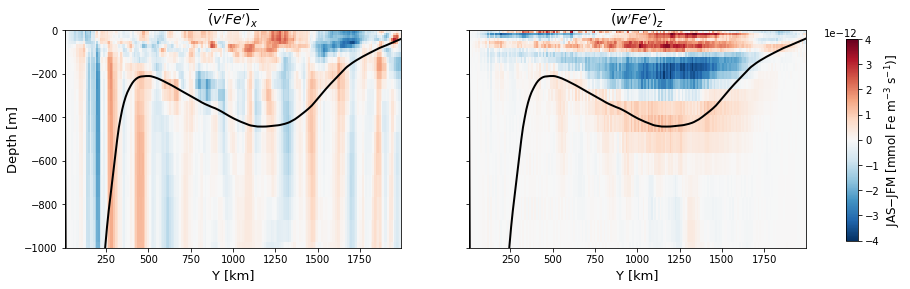

In [158]:
Tlevs = np.arange(-1.,8.5,.5) + 0.
yy, zz = np.meshgrid(ds.YC.data[::10], ds.Z.data[::3])
N = wpFep_b.data[::3,::10].shape

nz = 25
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
# fig.set_tight_layout(True)
ax1.pcolormesh(T_clim.YC*1e-3, T_clim.Z[:nz], (advpfep_bar[2]-advpfep_bar[0])[:nz], 
               vmax=4e-12, vmin=-4e-12, cmap='RdBu_r', 
               rasterized=True)
im = ax2.pcolormesh(T_clim.YC*1e-3, T_clim.Z[:nz], (-adwpfep_bar[2]-(-adwpfep_bar[0]))[:nz], 
                   vmax=4e-12, vmin=-4e-12, cmap='RdBu_r', 
                   rasterized=True)
ax1.plot(MLD.YC*1e-3, -MLD, 'k', lw=2)
ax2.plot(MLD.YC*1e-3, -MLD, 'k', lw=2)
# ax.contour(T_clim.YC, T_clim.Z, T_clim, levels=Tlevs, lw=2)
# #            , cmap='RdBu_r')
# ax.quiver(yy, zz, vpFep_b[::3,::10], 
#           np.ones((N[0],N[1]))*wpFep_b[::3,::10], 
#           pivot='mid', angles='xy')
#           , scale_units='xy', scale=1.)
ax1.set_title(r"$\overline{(v'Fe')_y}$", fontsize=14)
ax2.set_title(r"$\overline{(w'Fe')_z}$", fontsize=14)
# ax.set_xticks(np.arange(0.,2e6,2.5e5))
ax2.set_yticklabels([])
# ax.set_xticklabels(['0','250','500','750','1000','1250','1500','1750'])
ax1.set_xlabel('Y [km]', fontsize=13)
ax1.set_ylabel('Depth [m]', fontsize=13)
ax2.set_xlabel('Y [km]', fontsize=13)
ax1.set_ylim([-1000,0.])
ax2.set_ylim([-1000,0.])
fig.subplots_adjust(right=0.86)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r"JAS$-$JFM [mmol Fe m$^{-3}$ s$^{-1}$)]", fontsize=12)
plt.savefig(op.join(ddir,'Figures/eddyfluxes_JAS-JFM.pdf'))

In [12]:
wa = dsw.wa
wp = dsw.wp
wres = wp-wa
# fe = grid.interp(Fe1D,'Z',boundary='fill')[::15,1:]
zPew = np.linspace(dsFe.Zl[1], dsFe.Zl[-1], 200)
func = pchip(np.abs(Fe1D.Z), (Fe1D[::15].sel(YC=slice(10e5,15e5))
                              * np.hanning(len(dsFe.YC.sel(YC=slice(10e5,15e5))))[np.newaxis,np.newaxis,:,np.newaxis]
                             ), axis=1)
feintp = xr.DataArray(func(np.abs(zPew)),  dims=['time','Zl','YC','XC'],
                     coords={'time':dsFe.time[::15].data,'Zl':zPew,
                             'YC':dsFe.YC.sel(YC=slice(10e5,15e5)).data,'XC':dsFe.XC.data}
                     )
feintp

<xarray.DataArray (time: 120, Zl: 200, YC: 50, XC: 100)>
array([[[[0., ..., 0.],
         ...,
         [0., ..., 0.]],

        ...,

        [[0., ..., 0.],
         ...,
         [0., ..., 0.]]],


       ...,


       [[[0., ..., 0.],
         ...,
         [0., ..., 0.]],

        ...,

        [[0., ..., 0.],
         ...,
         [0., ..., 0.]]]])
Coordinates:
  * time     (time) float64 8.46e+09 8.462e+09 8.463e+09 8.464e+09 8.466e+09 ...
  * Zl       (Zl) float64 -10.0 -24.43 -38.86 -53.3 -67.73 -82.16 -96.59 ...
  * YC       (YC) >f4 1005000.0 1015000.0 1025000.0 1035000.0 1045000.0 ...
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...

In [60]:
wa

<xarray.DataArray 'wa' (time: 120, Zl: 200, YC: 100, XC: 200)>
dask.array<shape=(120, 200, 100, 200), dtype=float64, chunksize=(24, 200, 100, 200)>
Coordinates:
  * Zl       (Zl) float64 -1.0 -15.19 -29.39 -43.58 -57.77 -71.96 -86.16 ...
  * YC       (YC) float32 1002500.0 1007500.0 1012500.0 1017500.0 1022500.0 ...
  * XC       (XC) float32 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 ...
  * time     (time) float64 9.643e+08 9.656e+08 9.669e+08 9.682e+08 ...

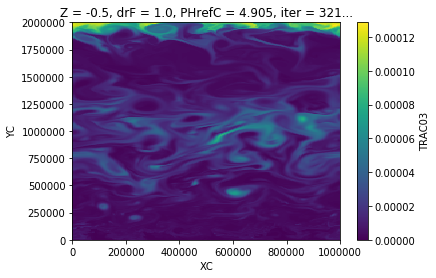

In [63]:
Fe1D[0,0].plot()

In [13]:
with ProgressBar():
    akfek = (xrft.dft(wa, dim=['XC'])
             * np.conj(xrft.dft(feintp.sel(YC=slice(10e5,15e5)), dim=['XC']))
            ).real.compute()
    rkfek = (xrft.dft(wres, dim=['XC'])
             * np.conj(xrft.dft(feintp.sel(YC=slice(10e5,15e5)), dim=['XC']))
            ).real.compute()
rkfek

/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed | 10.2s
[########################################] | 100% Completed | 11.9s


<xarray.DataArray (time: 120, Zl: 200, YC: 50, freq_XC: 100)>
array([[[[ 0., ...,  0.],
         ...,
         [-0., ...,  0.]],

        ...,

        [[ 0., ...,  0.],
         ...,
         [ 0., ...,  0.]]],


       ...,


       [[[ 0., ...,  0.],
         ...,
         [ 0., ...,  0.]],

        ...,

        [[ 0., ..., -0.],
         ...,
         [ 0., ...,  0.]]]])
Coordinates:
  * time             (time) float64 8.46e+09 8.462e+09 8.463e+09 8.464e+09 ...
  * Zl               (Zl) float64 -10.0 -24.43 -38.86 -53.3 -67.73 -82.16 ...
  * YC               (YC) float32 1005000.0 1015000.0 1025000.0 1035000.0 ...
  * freq_XC          (freq_XC) float64 -5e-05 -4.9e-05 -4.8e-05 -4.7e-05 ...
    freq_XC_spacing  float64 1e-06

In [14]:
seas = np.tile(np.repeat(range(4),6),dy10)
akfek.coords['seas'] = ('time',seas)
rkfek.coords['seas'] = ('time',seas)
akfek_seas = akfek.groupby('seas').mean('time').compute()
rkfek_seas = rkfek.groupby('seas').mean('time').compute()

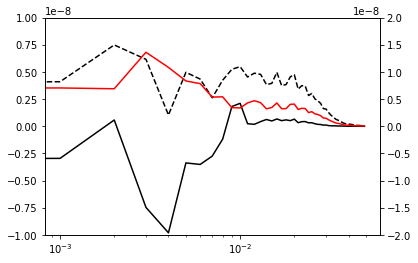

In [257]:
nz = 7
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(akfek.freq_XC*1e3, akfek[:,nz].sel(YC=slice(11e5,14e5)).mean(['time','YC']), 'k')
ax.plot(rkfek.freq_XC*1e3, rkfek[:,nz].sel(YC=slice(11e5,14e5)).mean(['time','YC']), 'k--')
ax2.plot(rkfek.freq_XC*1e3, (rkfek-akfek)[:,nz].sel(YC=slice(11e5,14e5)).mean(['time','YC']), 'r')
ax.set_ylim([-1e-8,1e-8])
ax2.set_ylim([-2e-8,2e-8])
ax.set_xscale('log')
ax2.set_xscale('log')

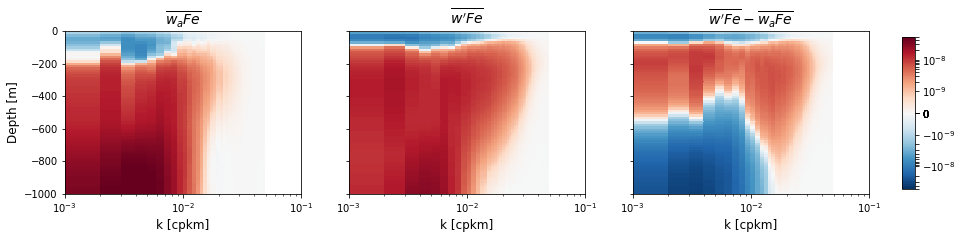

In [15]:
nx = 51
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
im = ax1.pcolormesh(akfek.freq_XC[nx:]*1e3, akfek.Zl, akfek[:,:,:,nx:].sel(YC=slice(11e5,14e5)).mean(['time','YC']),
                   cmap='RdBu_r',
                   norm=colors.SymLogNorm(1e-9, vmax=5e-8, vmin=-5e-8))
ax2.pcolormesh(rkfek.freq_XC[nx:]*1e3, rkfek.Zl, rkfek[:,:,:,nx:].sel(YC=slice(11e5,14e5)).mean(['time','YC']),
              cmap='RdBu_r',
              norm=colors.SymLogNorm(1e-9, vmax=5e-8, vmin=-5e-8))
ax3.pcolormesh(rkfek.freq_XC[nx:]*1e3, rkfek.Zl, (rkfek-akfek)[:,:,:,nx:].sel(YC=slice(11e5,14e5)).mean(['time','YC']),
              cmap='RdBu_r',
              norm=colors.SymLogNorm(1e-9, vmax=5e-8, vmin=-5e-8))
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax1.set_ylim([-1e3,0])
ax2.set_ylim([-1e3,0])
ax3.set_ylim([-1e3,0])
ax1.set_xlim([1e-3,1e-1])
ax2.set_xlim([1e-3,1e-1])
ax3.set_xlim([1e-3,1e-1])
ax1.set_title(r"$\overline{w_aFe}$", fontsize=14)
ax2.set_title(r"$\overline{w'Fe}$", fontsize=14)
ax3.set_title(r"$\overline{w'Fe}-\overline{w_aFe}$", fontsize=14)
ax1.set_xlabel(r"k [cpkm]", fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax2.set_xlabel(r"k [cpkm]", fontsize=12)
ax3.set_xlabel(r"k [cpkm]", fontsize=12)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, format=ticker.LogFormatterMathtext())
# cbar.set_label(r"JAS$-$JFM [mmol Fe m$^{-3}$ s$^{-1}$)]", fontsize=12)
plt.savefig(op.join(ddir,'Figures/wFe_annual_10km.pdf'))

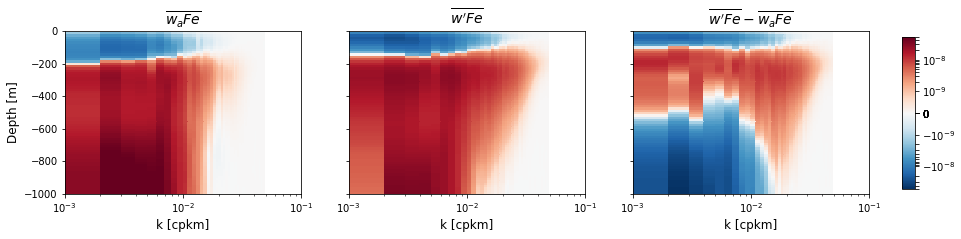

In [16]:
nx = 51
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
im = ax1.pcolormesh(akfek_seas.freq_XC[nx:]*1e3, akfek_seas.Zl, 
                    akfek_seas[2,:,:,nx:].sel(YC=slice(11e5,14e5)).mean(['YC']),
                    cmap='RdBu_r',
                    norm=colors.SymLogNorm(1e-9, vmax=5e-8, vmin=-5e-8))
ax2.pcolormesh(rkfek_seas.freq_XC[nx:]*1e3, rkfek_seas.Zl, 
               rkfek_seas[2,:,:,nx:].sel(YC=slice(11e5,14e5)).mean(['YC']),
               cmap='RdBu_r',
               norm=colors.SymLogNorm(1e-9, vmax=5e-8, vmin=-5e-8))
ax3.pcolormesh(rkfek_seas.freq_XC[nx:]*1e3, rkfek_seas.Zl, 
               (rkfek_seas-akfek_seas)[2,:,:,nx:].sel(YC=slice(11e5,14e5)).mean(['YC']),
               cmap='RdBu_r',
               norm=colors.SymLogNorm(1e-9, vmax=5e-8, vmin=-5e-8))
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax1.set_ylim([-1e3,0])
ax2.set_ylim([-1e3,0])
ax3.set_ylim([-1e3,0])
ax1.set_xlim([1e-3,1e-1])
ax2.set_xlim([1e-3,1e-1])
ax3.set_xlim([1e-3,1e-1])
ax1.set_title(r"$\overline{w_aFe}$", fontsize=14)
ax2.set_title(r"$\overline{w'Fe}$", fontsize=14)
ax3.set_title(r"$\overline{w'Fe}-\overline{w_aFe}$", fontsize=14)
ax1.set_xlabel(r"k [cpkm]", fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax2.set_xlabel(r"k [cpkm]", fontsize=12)
ax3.set_xlabel(r"k [cpkm]", fontsize=12)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, format=ticker.LogFormatterMathtext())
# cbar.set_label(r"JAS$-$JFM [mmol Fe m$^{-3}$ s$^{-1}$)]", fontsize=12)
plt.savefig(op.join(ddir,'Figures/wFe_JAS_10km.pdf'))

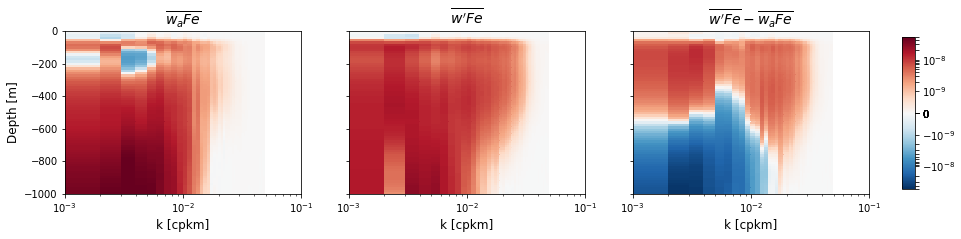

In [17]:
nx = 51
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
im = ax1.pcolormesh(akfek_seas.freq_XC[nx:]*1e3, akfek_seas.Zl, 
                    akfek_seas[0,:,:,nx:].sel(YC=slice(11e5,14e5)).mean(['YC']),
                    cmap='RdBu_r',
                    norm=colors.SymLogNorm(1e-9, vmax=5e-8, vmin=-5e-8))
ax2.pcolormesh(rkfek_seas.freq_XC[nx:]*1e3, rkfek_seas.Zl, 
               rkfek_seas[0,:,:,nx:].sel(YC=slice(11e5,14e5)).mean(['YC']),
               cmap='RdBu_r',
               norm=colors.SymLogNorm(1e-9, vmax=5e-8, vmin=-5e-8))
ax3.pcolormesh(rkfek_seas.freq_XC[nx:]*1e3, rkfek_seas.Zl, 
               (rkfek_seas-akfek_seas)[0,:,:,nx:].sel(YC=slice(11e5,14e5)).mean(['YC']),
               cmap='RdBu_r',
               norm=colors.SymLogNorm(1e-9, vmax=5e-8, vmin=-5e-8))
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax1.set_ylim([-1e3,0])
ax2.set_ylim([-1e3,0])
ax3.set_ylim([-1e3,0])
ax1.set_xlim([1e-3,1e-1])
ax2.set_xlim([1e-3,1e-1])
ax3.set_xlim([1e-3,1e-1])
ax1.set_title(r"$\overline{w_aFe}$", fontsize=14)
ax2.set_title(r"$\overline{w'Fe}$", fontsize=14)
ax3.set_title(r"$\overline{w'Fe}-\overline{w_aFe}$", fontsize=14)
ax1.set_xlabel(r"k [cpkm]", fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax2.set_xlabel(r"k [cpkm]", fontsize=12)
ax3.set_xlabel(r"k [cpkm]", fontsize=12)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, format=ticker.LogFormatterMathtext())
# cbar.set_label(r"JAS$-$JFM [mmol Fe m$^{-3}$ s$^{-1}$)]", fontsize=12)
plt.savefig(op.join(ddir,'Figures/wFe_JFM_10km.pdf'))

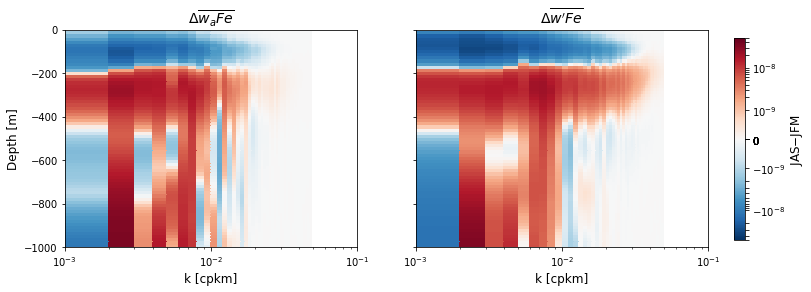

In [18]:
nx = 51
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
im = ax1.pcolormesh(akfek_seas.freq_XC[nx:]*1e3, akfek_seas.Zl, 
                    (akfek_seas[2]-akfek_seas[0])[:,:,nx:].sel(YC=slice(11e5,14e5)).mean(['YC']),
                    cmap='RdBu_r', rasterized=True,
                    norm=colors.SymLogNorm(1e-9, vmax=5e-8, vmin=-5e-8))
ax2.pcolormesh(rkfek_seas.freq_XC[nx:]*1e3, rkfek_seas.Zl, 
               (rkfek_seas[2]-rkfek_seas[0])[:,:,nx:].sel(YC=slice(11e5,14e5)).mean(['YC']),
               cmap='RdBu_r', rasterized=True,
               norm=colors.SymLogNorm(1e-9, vmax=5e-8, vmin=-5e-8))
ax1.set_xscale('log')
ax2.set_xscale('log')
ax2.set_yticklabels([])
ax1.set_ylim([-1e3,0])
ax2.set_ylim([-1e3,0])
ax1.set_xlim([1e-3,1e-1])
ax2.set_xlim([1e-3,1e-1])
ax1.set_title(r"$\Delta\overline{w_aFe}$", fontsize=14)
ax2.set_title(r"$\Delta\overline{w'Fe}$", fontsize=14)
ax1.set_xlabel(r"k [cpkm]", fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax2.set_xlabel(r"k [cpkm]", fontsize=12)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, format=ticker.LogFormatterMathtext())
cbar.set_label(r"JAS$-$JFM", fontsize=12)
# cbar.set_label(r"JAS$-$JFM [mmol Fe m$^{-3}$ s$^{-1}$)]", fontsize=12)
# fig.suptitle(r"JAS$-$JFM", fontsize=15, y=1.02)
plt.savefig(op.join(ddir,'Figures/dwFe_seasonaldiff_10km.pdf'))

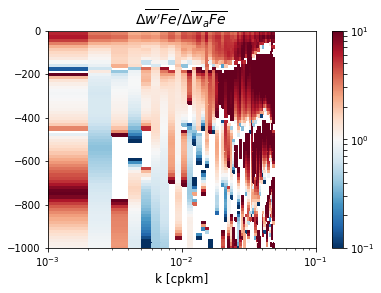

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
im = ax.pcolormesh(akfek_seas.freq_XC[nx:]*1e3, akfek_seas.Zl,
                  (rkfek_seas[2]-rkfek_seas[0])[:,:,nx:].sel(YC=slice(11e5,14e5)).mean(['YC'])
                  / (akfek_seas[2]-akfek_seas[0])[:,:,nx:].sel(YC=slice(11e5,14e5)).mean(['YC']),
                  norm=colors.LogNorm(vmax=1e1, vmin=1e-1),
                  cmap='RdBu_r', rasterized=True)
ax.set_xscale('log')
ax.set_xlabel(r"k [cpkm]", fontsize=12)
ax.set_ylim([-1e3,0])
ax.set_xlim([1e-3,1e-1])
cbar = fig.colorbar(im, ax=ax)
ax.set_title(r"$\Delta\overline{w'Fe} / \Delta\overline{w_aFe}$", fontsize=14)
plt.savefig(op.join(ddir,'Figures/dwFe_seasratio_10km.pdf'))

# Other mactronutrients (P,N,Si)

In [53]:
dsPNSi = open_mdsdataset(op.join(ddir, 'zerores_-2monDML_BGC'),iters=range(ts-144+4320,te,4320),
                         prefix=['PTRtave01','PTRtave02','PTRtave04'], delta_t=6e2
                        )
with ProgressBar():
    dsPNSi_clim = dsPNSi.mean(['time','XC','XG'])
p_clim = dsPNSi_clim.PTRtave01
n_clim = dsPNSi_clim.PTRtave02
i_clim = dsPNSi_clim.PTRtave04

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


In [47]:
13996800 - 13944960

51840